In [2]:
import os
import numpy as np
import configue
import matplotlib.pyplot as plt
from lucent.modelzoo.util import get_model_layers
from lucent.optvis import render
from PIL import Image
from random import randrange
from models import get_pretrained_model
from finetune import load_model_from_checkpoint

In [3]:
config = configue.load("config.yaml")
config["model"] = "resnet18"
config["intermediate_forward"] = False
config["last_frozen_layer"] = ""
initial_resnet18 = get_pretrained_model(config)
fine_tuned_resnet18 = get_pretrained_model(config)
fine_tuned_resnet18 = load_model_from_checkpoint(get_pretrained_model(config), "experiments/23-03-04_12:59:53/best_model.pth")

In [4]:
def render_and_save_img(model, neuron_name, filename, show_inline=True):
    images = render.render_vis(model, neuron_name, show_inline=show_inline)
    image = np.concatenate(images[0], axis=1)
    image = Image.fromarray((image * 255).astype(np.uint8))
    os.makedirs("explainability", exist_ok=True)
    image.save(os.path.join("explainability", filename))


184


100%|██████████| 512/512 [01:38<00:00,  5.22it/s]



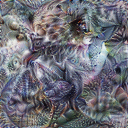

100%|██████████| 512/512 [01:40<00:00,  5.11it/s]



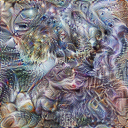

328


100%|██████████| 512/512 [01:40<00:00,  5.09it/s]



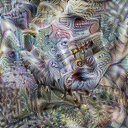

100%|██████████| 512/512 [01:39<00:00,  5.15it/s]



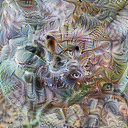

354


100%|██████████| 512/512 [01:43<00:00,  4.94it/s]



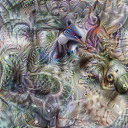

100%|██████████| 512/512 [01:46<00:00,  4.79it/s]



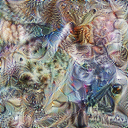

150


100%|██████████| 512/512 [01:42<00:00,  5.02it/s]



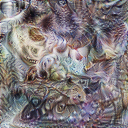

100%|██████████| 512/512 [01:44<00:00,  4.89it/s]



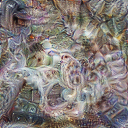

347


100%|██████████| 512/512 [01:42<00:00,  4.99it/s]



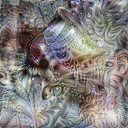

100%|██████████| 512/512 [01:37<00:00,  5.26it/s]



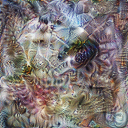

333


100%|██████████| 512/512 [01:42<00:00,  5.00it/s]



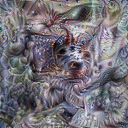

100%|██████████| 512/512 [01:45<00:00,  4.87it/s]



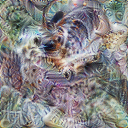

403


100%|██████████| 512/512 [01:49<00:00,  4.68it/s]



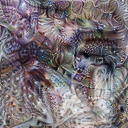

100%|██████████| 512/512 [01:42<00:00,  5.01it/s]



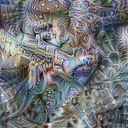

359


100%|██████████| 512/512 [01:43<00:00,  4.94it/s]



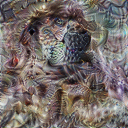

100%|██████████| 512/512 [01:57<00:00,  4.35it/s]



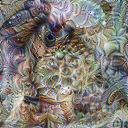

120


 58%|█████▊    | 298/512 [01:07<00:48,  4.39it/s]

Interrupted optimization at step 299.



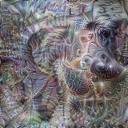

 12%|█▏        | 62/512 [00:12<01:29,  5.03it/s]

In [4]:
for i in range(10): 
    neuron_number = randrange(0, 512)
    while os.path.exists(f'initial_resnet18_neuron_{neuron_number}.png') : 
        neuron_number = randrange(0, 512)
    print(neuron_number)
    render_and_save_img(initial_resnet18, f'unfrozen_layers_7_1_conv2:{neuron_number}', f'initial_resnet18_neuron_{neuron_number}.png')
    render_and_save_img(fine_tuned_resnet18, f'unfrozen_layers_7_1_conv2:{neuron_number}', f'fine_tuned_resnet18_neuron_{neuron_number}.png')

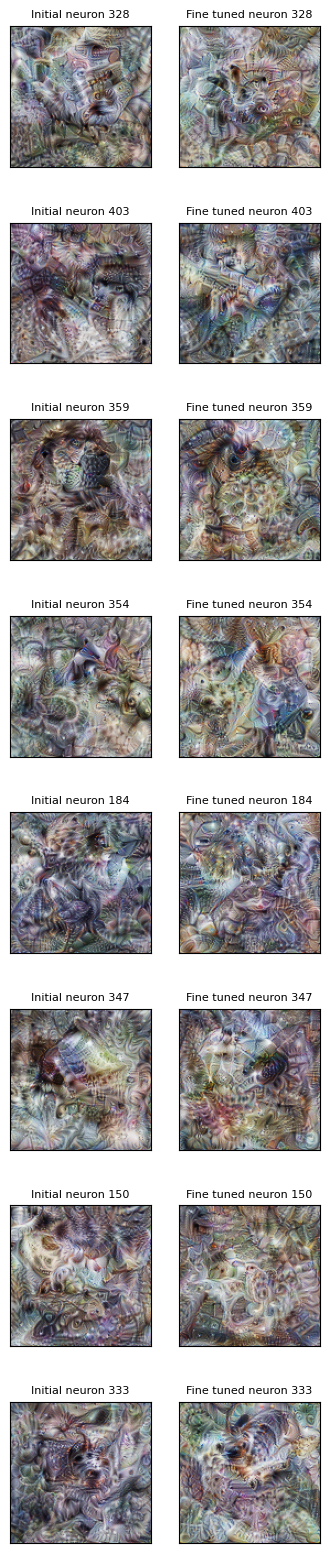

In [23]:
neuron_ids = []
fine_tuned_list = []
initial_list = []
for image in os.listdir("explainability") : 
    if image.startswith("fine_tuned_resnet18_neuron"):
        neuron_id = image.split("fine_tuned_resnet18_neuron_")[1][:-4]
        neuron_ids.append(neuron_id)
        fine_tuned_list.append(plt.imread(os.path.join("explainability", image)))
        initial_list.append(plt.imread(os.path.join("explainability", f"initial_resnet18_neuron_{neuron_id}.png")))

fig, axes = plt.subplots(nrows=len(fine_tuned_list), ncols=2, figsize=(4, 20))
for i in range(len(fine_tuned_list)):
    ax1 = axes[i][1]
    ax1.imshow(fine_tuned_list[i], extent=[-4, 4, -1, 1], aspect=4)
    ax1.set_title(f"Fine tuned neuron {neuron_ids[i]}", fontsize=8)
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax2 = axes[i][0]
    ax2.imshow(initial_list[i], extent=[-4, 4, -1, 1], aspect=4)
    ax2.set_title(f"Initial neuron {neuron_ids[i]}", fontsize=8)
    ax2.set_yticks([])
    ax2.set_xticks([])
plt.show()
        